<a href="https://colab.research.google.com/github/shineloveyc/Hands-on-ML-Practice/blob/main/Classification/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a spam classifier 

1. Data Prep

In [90]:
#load module
import numpy as np
import pandas as pd
from google.colab import drive
import os
from os.path import isfile, join
from os import listdir
import tarfile
import urllib.request as request
import glob

In [106]:
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'
os.chdir(base_dir)
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive/My Drive/Colab Notebooks'

In [92]:
DOWNLOAD_ROOT = "https://spamassassin.apache.org/old/publiccorpus/"

#specify the folder to save data
SPAM_PATH = os.path.join("data", "spam")

In [93]:
#def the function to fetch the data
def fetch_data(spam_path = SPAM_PATH, file_name='20021010_easy_ham.tar.bz2'):
  #make directory in the workspace
  os.makedirs(spam_path, exist_ok = True)
  #get web path to download the data, the file name could be change
  tgz_path = os.path.join(spam_path, file_name)
  #url to download the data
  SPAM_URL = DOWNLOAD_ROOT + file_name
  #Copy a network object denoted by a URL to a local file==>which is tgz_path
  request.urlretrieve(SPAM_URL, tgz_path)
  #read from and write to tar format archives.
  spam_tgz = tarfile.open(tgz_path)
  #extract all the files to local directory
  spam_tgz.extractall(path = spam_path)
  spam_tgz.close()

In [94]:
#fetch easy ham data
#easy_ham_data = fetch_data()

In [95]:
#fetch hard ham data
#hard_ham_data = fetch_data(file_name='20021010_hard_ham.tar.bz2')

In [96]:
#fetch spam data
#spam_data = fetch_data(file_name = '20021010_spam.tar.bz2')

- spam: 500 spam messages, all received from non-spam-trap sources.

- easy_ham: 2500 non-spam messages.  These are typically quite easy to
    differentiate from spam, since they frequently do not contain any spammish
    signatures (like HTML etc).

- hard_ham: 250 non-spam messages which are closer in many respects to
    typical spam: use of HTML, unusual HTML markup, coloured text,
    "spammish-sounding" phrases etc.
- link to dataset: https://spamassassin.apache.org/old/publiccorpus/

In [97]:
len(files)

2551

In [107]:
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks'

In [119]:
#def function to load the data
def data_loader(dir_name):
  dir_path = os.path.join(SPAM_PATH, dir_name)
  load_dir = os.path.join(base_dir, dir_path)
  os.chdir(load_dir)

  #load the files from the directory
  files = [f for f in listdir(load_dir)]
  
  #read binary files
  text_list = []
  for one_f in files:
    with open(one_f, mode = 'rb') as f:
      text = f.read()
      text_list.append(text)
  return text_list

In [120]:
def data_convert(list_name, label):
  df_list = data_loader(list_name)
  print(len(df_list))
  df = pd.DataFrame(df_list, columns=['content'])
  df['label'] = label

  return df

In [121]:
#load data
easy_ham_df = data_convert('easy_ham', 0)
hard_ham_df = data_convert('hard_ham', 0)
spam_df = data_convert('spam', 1)

/content/gdrive/My Drive/Colab Notebooks/data/spam/easy_ham
2551
/content/gdrive/My Drive/Colab Notebooks/data/spam/hard_ham
250
/content/gdrive/My Drive/Colab Notebooks/data/spam/spam
501


In [124]:
#combine and shuffle the dataset
comb_df = pd.concat([easy_ham_df, hard_ham_df, spam_df])

In [127]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3302 entries, 0 to 500
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  3302 non-null   object
 1   label    3302 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 157.4+ KB


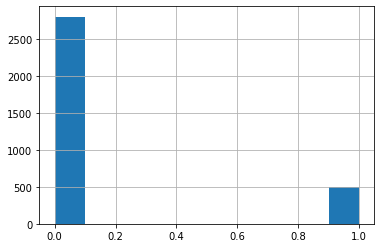

In [128]:
#check the data distribution
comb_df['label'].hist()

In [131]:
#split the data to training and test data by using stratify sampling
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(comb_df, random_state =42, 
                                       test_size = 0.2, stratify = comb_df['label'])

In [134]:
#check the class propotion in each set
train_set['label'].value_counts()/len(train_set['content'])

0    0.848164
1    0.151836
Name: label, dtype: float64

In [135]:
test_set['label'].value_counts()/len(test_set['content'])

0    0.848714
1    0.151286
Name: label, dtype: float64

In [136]:
X_train = train_set.drop('label', axis = 1)
y_train = train_set['label'].copy

2. Data Clean